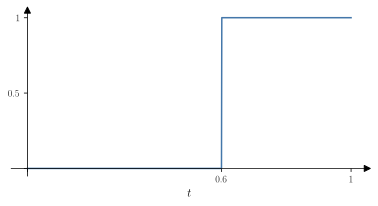

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as matplotlib_inline
import matplotlib.ticker as ticker
import os
import sys

src_path = os.path.abspath('../..')
if src_path not in sys.path:
    sys.path.append(src_path)

matplotlib_inline.rcParams.update({
    'text.usetex': True,             # Use LaTeX for all text rendering
    'font.family': 'libertine',          # Use LaTeX's default font
    'font.serif': ['Computer Modern'], # Match LaTeX default serif font
    'font.size': 12,                 # Adjust as needed to match your LaTeX document
    'axes.labelsize': 12,            # Match LaTeX font sizes for axes labels
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})

from enum import Enum
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from src.tools.tol_colors import tol_cmap, tol_cset

class fType(Enum):
    JUMP = 0,
    KINK = 1

T = 1

def computeValue(type: fType, x, x_0):
		if (type == fType.JUMP):
			return (0 if x <= x_0 else 1)
		else:
			if x_0 < T/2:
				return (x_0 - x if x < x_0 else 0)
			else:
				return (x - x_0 if x > x_0 else 0)

line_x = np.linspace(0, 1, 1000)
line_jump = np.array([computeValue(fType.JUMP, x, 0.6) for x in line_x])
line_kink = np.array([computeValue(fType.KINK, x, 0.6) for x in line_x])

cmap = tol_cset('bright')
f = plt.figure()
f.set_figheight(3)

ax = plt.gca()  # Get the current Axes instance
ax.spines[["left", "bottom"]].set_position("zero")
ax.spines[['top', 'right']].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: '' if val == 0 else f'{val:g}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: '' if val == 0 else f'{val:g}'))

plt.yticks(np.array([0, 0.5, 1]))
plt.xticks(np.array([0, 0.6, 1]))
plt.xlabel(r'$t$')
plt.plot(line_x, line_jump, color=cmap[0])
#plt.show()
plt.savefig('jump_function.svg')